In [1]:
!pip install pandas-datareader
!pip install yfinance

In [2]:
import math
import pandas_datareader as web
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
import yfinance as yf
from datetime import datetime, timedelta
from scipy.stats import kstest

In [3]:
# Ambil data historis saham
df = yf.download('AGI', start='2023-12-12', end='2024-12-13')
df

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AGI,AGI,AGI,AGI,AGI
Date,,,,,
2023-12-12,13.078034,13.436336,13.048175,13.366667,3608900
2023-12-13,13.924025,13.953884,13.048174,13.137750,4279700
2023-12-14,13.814543,14.272373,13.705062,14.182798,4013400
2023-12-15,13.575676,13.864308,13.545817,13.864308,6063500
2023-12-18,13.585628,13.814543,13.535864,13.724968,2708900
...,...,...,...,...,...
2024-12-06,19.059999,19.459999,18.920000,19.459999,1445700
2024-12-09,19.540001,20.040001,19.480000,19.520000,2324000


In [4]:
df.head()

Price,Close,High,Low,Open,Volume
Ticker,AGI,AGI,AGI,AGI,AGI
Date,,,,,
2023-12-12,13.078034,13.436336,13.048175,13.366667,3608900
2023-12-13,13.924025,13.953884,13.048174,13.137750,4279700
2023-12-14,13.814543,14.272373,13.705062,14.182798,4013400
2023-12-15,13.575676,13.864308,13.545817,13.864308,6063500
2023-12-18,13.585628,13.814543,13.535864,13.724968,2708900


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 253 entries, 2023-12-12 to 2024-12-12
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   (Close, AGI)   253 non-null    float64
 1   (High, AGI)    253 non-null    float64
 2   (Low, AGI)     253 non-null    float64
 3   (Open, AGI)    253 non-null    float64
 4   (Volume, AGI)  253 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 11.9 KB


In [6]:
df.shape

(253, 5)

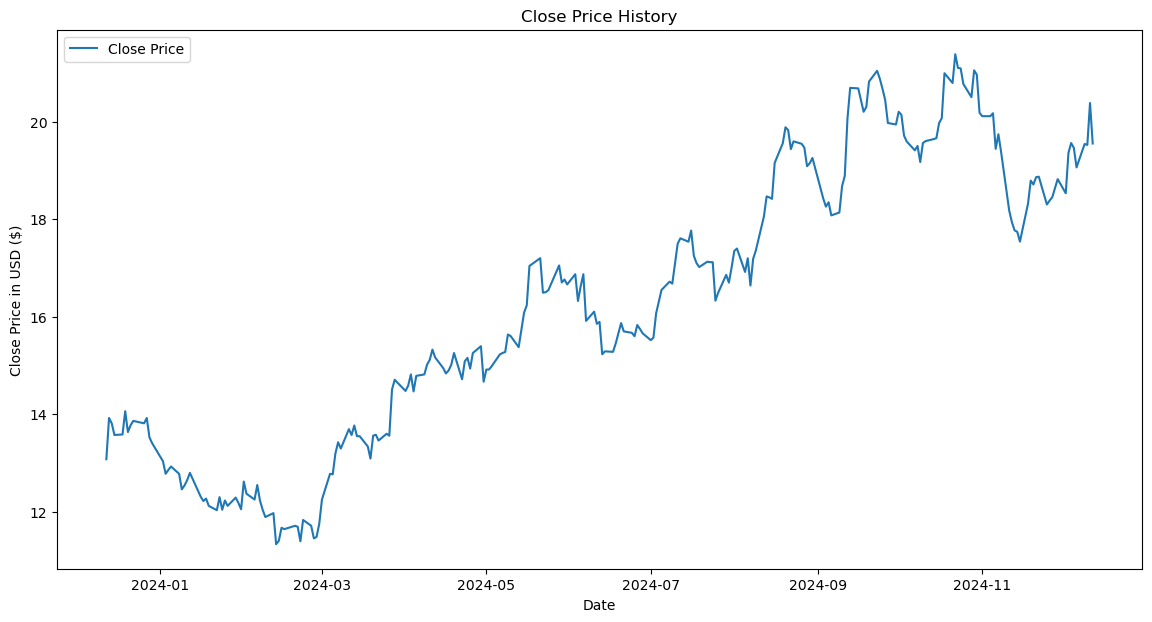

In [7]:
plt.figure(figsize=(14, 7))
plt.plot(df['Close'], label='Close Price')
plt.title('Close Price History')
plt.xlabel('Date')
plt.ylabel('Close Price in USD ($)')
plt.legend(loc='upper left')
plt.show()

Simulasi Monte Carlo untuk AGI selesai.
Harga Aktual: 19.55
Harga Prediksi Rata-Rata: 19.61
Interval Kepercayaan 95%: (17.82, 21.54)
Harga aktual berada dalam interval kepercayaan. Ini menunjukkan stabilitas.


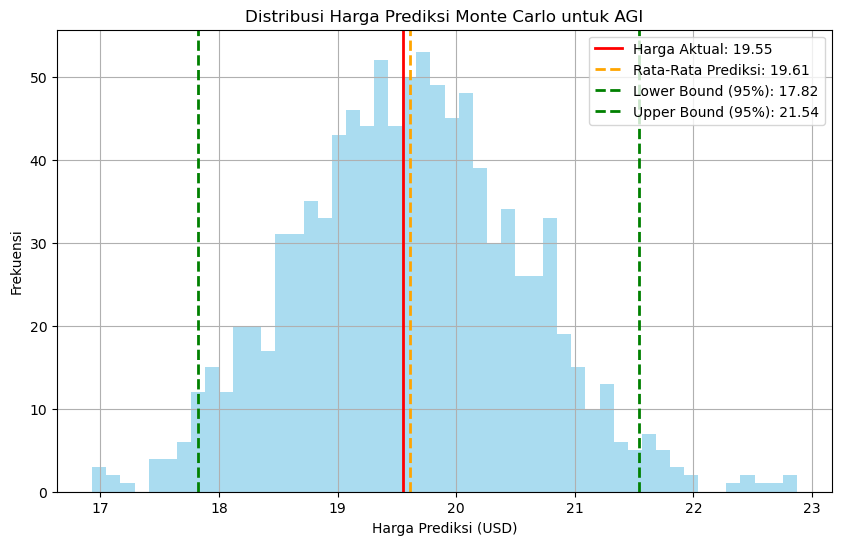

KS Statistic: 0.04808636872682959, p-value: 0.5876652116646408
Data mengikuti distribusi normal (gagal tolak H0).
Jarque-Bera Statistic: 5.026259936750512, p-value: 0.08101426988751562
Data mengikuti distribusi normal (gagal tolak H0) berdasarkan Jarque-Bera.


In [8]:
from scipy.stats import kstest, jarque_bera
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

# Define Monte Carlo Simulation Class
class MonteCarlo:
    def __init__(self, ticker, start_date, end_date, days, sim):
        self.ticker = ticker
        self.start_date = start_date
        self.end_date = end_date
        self.noOfSimulations = sim
        self.noOfDays = days
        self.data = None
        self.simulations = None

        self.import_stock_data()
        self.calc_log_returns()
        self.volatility_calc()

    def import_stock_data(self):
        stock = yf.Ticker(self.ticker)
        self.data = stock.history(start=self.start_date, end=self.end_date)

    def calc_log_returns(self):
        self.data['Log Returns'] = np.log(self.data['Close'] / self.data['Close'].shift(1))

    def volatility_calc(self):
        self.volatility = self.data['Log Returns'].std()
        self.mean_price = self.data['Close'].mean()

    def simulate(self):
        last_price = self.data['Close'].iloc[-1]
        simulations = np.zeros((self.noOfSimulations, self.noOfDays))
        for i in range(self.noOfSimulations):
            daily_returns = np.random.normal(0, self.volatility, self.noOfDays)
            simulations[i] = last_price * np.exp(np.cumsum(daily_returns))
        self.simulations = simulations

    def results(self):
        if self.simulations is None:
            raise ValueError("Simulasi belum dijalankan. Jalankan `simulate()` terlebih dahulu.")
        
        # Harga prediksi dan interval kepercayaan
        predicted_prices = self.simulations[:, -1]  # Harga prediksi pada hari terakhir
        mean_predicted_price = np.mean(predicted_prices)
        lower_bound_95 = np.percentile(predicted_prices, 2.5)
        upper_bound_95 = np.percentile(predicted_prices, 97.5)

        # Harga aktual
        actual_price = self.data['Close'].iloc[-1]

        # Perbandingan
        print(f"Simulasi Monte Carlo untuk {self.ticker} selesai.")
        print(f"Harga Aktual: {actual_price:.2f}")
        print(f"Harga Prediksi Rata-Rata: {mean_predicted_price:.2f}")
        print(f"Interval Kepercayaan 95%: ({lower_bound_95:.2f}, {upper_bound_95:.2f})")

        if actual_price < lower_bound_95 or actual_price > upper_bound_95:
            print("Harga aktual berada di luar interval kepercayaan. Ini menunjukkan volatilitas tinggi.")
        else:
            print("Harga aktual berada dalam interval kepercayaan. Ini menunjukkan stabilitas.")

        # Plot hasil simulasi
        self.plot_simulation(actual_price, mean_predicted_price, lower_bound_95, upper_bound_95)

        # Test Normality using KS Test and Jarque-Bera Test
        self.normality_test()

    def plot_simulation(self, actual_price, mean_predicted_price, lower_bound_95, upper_bound_95):
        # Visualisasi distribusi harga prediksi
        predicted_prices = self.simulations[:, -1]

        plt.figure(figsize=(10, 6))
        plt.hist(predicted_prices, bins=50, color='skyblue', alpha=0.7)
        plt.axvline(actual_price, color='red', linestyle='solid', linewidth=2, label=f"Harga Aktual: {actual_price:.2f}")
        plt.axvline(mean_predicted_price, color='orange', linestyle='dashed', linewidth=2, label=f"Rata-Rata Prediksi: {mean_predicted_price:.2f}")
        plt.axvline(lower_bound_95, color='green', linestyle='dashed', linewidth=2, label=f"Lower Bound (95%): {lower_bound_95:.2f}")
        plt.axvline(upper_bound_95, color='green', linestyle='dashed', linewidth=2, label=f"Upper Bound (95%): {upper_bound_95:.2f}")
        plt.title(f"Distribusi Harga Prediksi Monte Carlo untuk {self.ticker}")
        plt.xlabel("Harga Prediksi (USD)")
        plt.ylabel("Frekuensi")
        plt.legend()
        plt.grid()
        plt.show()

    def normality_test(self):
        # Perform Kolmogorov-Smirnov test for normality
        log_returns = self.data['Log Returns'].dropna()
        mean = log_returns.mean()
        std = log_returns.std()
        
        stat, p_value_ks = kstest(log_returns, 'norm', args=(mean, std))
        print(f"KS Statistic: {stat}, p-value: {p_value_ks}")
        if p_value_ks > 0.05:
            print("Data mengikuti distribusi normal (gagal tolak H0).")
        else:
            print("Data tidak mengikuti distribusi normal (tolak H0).")
        
        # Perform Jarque-Bera test for skewness and kurtosis
        jb_stat, jb_p_value = jarque_bera(log_returns)
        print(f"Jarque-Bera Statistic: {jb_stat}, p-value: {jb_p_value}")
        if jb_p_value > 0.05:
            print("Data mengikuti distribusi normal (gagal tolak H0) berdasarkan Jarque-Bera.")
        else:
            print("Data tidak mengikuti distribusi normal (tolak H0) berdasarkan Jarque-Bera.")

# Penggunaan contoh
tickers = ["AGI"]

for ticker in tickers:
    simulation = MonteCarlo(
        ticker=ticker,
        start_date="2023-12-12",
        end_date="2024-12-13",
        days=5,
        sim=1000
    )
    simulation.simulate()  # Jalankan simulasi
    simulation.results()   # Tampilkan hasil dan visualisasi


In [9]:
def log_returns(stock_data):

    # Assuming you're interested in the 'Close' prices
    log_returns = np.log(1 + stock_data['Close'].pct_change())
    log_returns = log_returns[1:]
    
    return log_returns

Ticker           AGI
Date                
2024-12-06 -0.020769
2024-12-09  0.024872
2024-12-10 -0.001024
2024-12-11  0.043114
2024-12-12 -0.041579


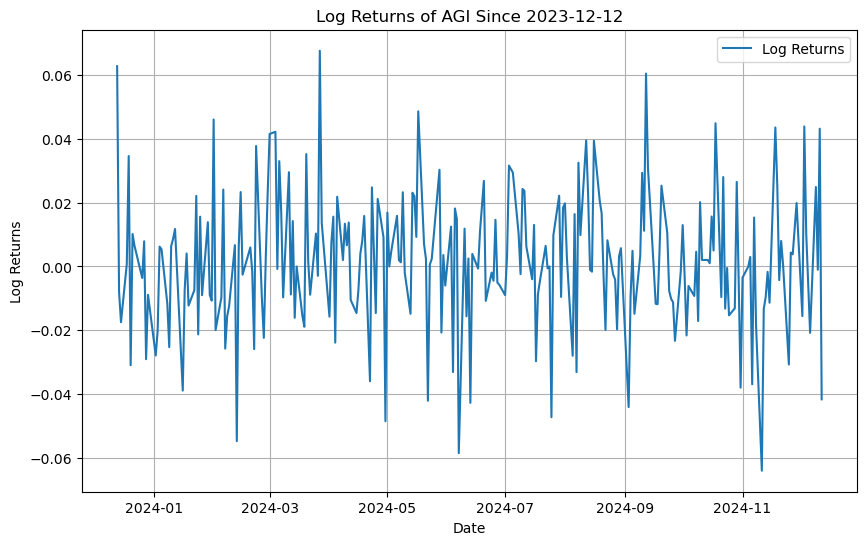

In [10]:
# Hitung log returns
log_return = log_returns(df)

# Tampilkan beberapa data terakhir
print(log_return.tail())

# Plot log returns
plt.figure(figsize=(10, 6))
plt.plot(log_return, label='Log Returns')
plt.title(f'Log Returns of AGI Since 2023-12-12')
plt.xlabel('Date')
plt.ylabel('Log Returns')
plt.legend()
plt.grid(True)
plt.show()

In [12]:
df['Return'] = df['Close'].pct_change()


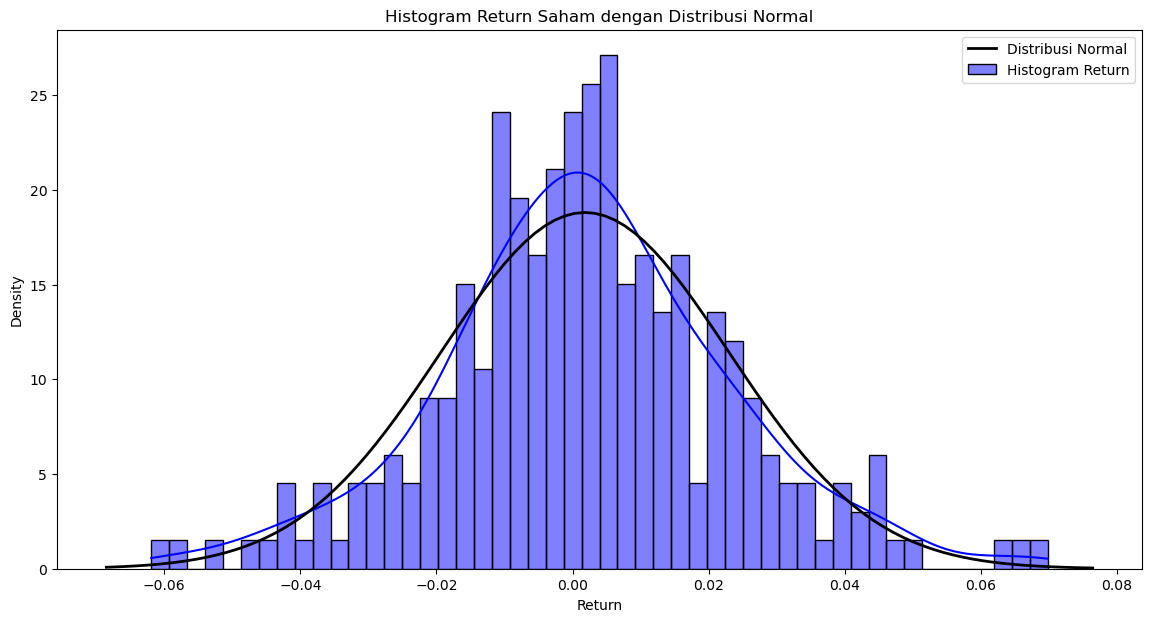

In [13]:
from scipy.stats import norm
import seaborn as sns
import matplotlib.pyplot as plt

# Menghapus nilai NaN dari data return
returns = df['Return'].dropna()

# Histogram dengan KDE (Kernel Density Estimate)
plt.figure(figsize=(14, 7))
sns.histplot(returns, bins=50, kde=True, stat="density", color="blue", label="Histogram Return")

# Distribusi Normal (Mean & Std Dev dari Data Return)
mean, std = returns.mean(), returns.std()
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mean, std)
plt.plot(x, p, 'k', linewidth=2, label="Distribusi Normal")

plt.title('Histogram Return Saham dengan Distribusi Normal')
plt.xlabel('Return')
plt.ylabel('Density')
plt.legend(loc='upper right')
plt.show()

In [325]:
import yfinance as yf
import pandas as pd
import numpy as np

# 1. Ambil Data Harga Saham
df = yf.download('AGI', start='2023-12-12', end='2024-12-13')
df['Harga Saham'] = df['Close']

# 2. Hitung Return dan Volatilitas
df['Return'] = df['Harga Saham'].pct_change()
df['Volatilitas'] = df['Return'].rolling(window=20).std()  # Volatilitas 20 hari
df.dropna(inplace=True)

# 3. Simulasikan Harga Saham (Monte Carlo)
np.random.seed(123)
n_days = len(df)
simulated_prices = []
predicted_prices = [df['Harga Saham'].iloc[0]]  # Mulai dari harga awal

for _ in range(n_days - 1):
    random_shock = np.random.normal(0, df['Volatilitas'].mean())
    new_price = predicted_prices[-1] * (1 + df['Return'].mean() + random_shock)
    predicted_prices.append(new_price)

df['Harga Saham Prediksi'] = predicted_prices

# 4. Hitung Absolute Percentage Error (APE)
df['APE'] = np.abs((df['Harga Saham Prediksi'] - df['Harga Saham']) / df['Harga Saham'])

# 5. Hitung MAPE (Mean Absolute Percentage Error)
mape = df['APE'].mean() * 100

# 6. Tampilkan Tabel
df.reset_index(inplace=True)
df_tabel = df[['Harga Saham', 'Return', 'Volatilitas', 'Harga Saham Prediksi', 'APE']]

# Cetak hasil
print(df_tabel)
print(f"\nMAPE: {mape:.2f}%")


[*********************100%***********************]  1 of 1 completed


Price  Harga Saham    Return Volatilitas Harga Saham Prediksi       APE
Ticker                                                                 
0        12.650062  0.008730    0.022797            12.650062  0.000000
1        12.799354  0.011802    0.017074            12.394349  0.031643
2        12.311664 -0.038103    0.018691            12.675121  0.029521
3        12.222089 -0.007276    0.018493            12.775909  0.045313
4        12.271853  0.004072    0.018564            12.407048  0.011017
..             ...       ...         ...                  ...       ...
228      19.059999 -0.020555    0.024477            18.925928  0.007034
229      19.540001  0.025184    0.024834            18.484257  0.054030
230      19.520000 -0.001024    0.020018            18.570782  0.048628
231      20.379999  0.044057    0.021505            17.998632  0.116848
232      19.549999 -0.040726    0.023754            18.316173  0.063111

[233 rows x 5 columns]

MAPE: 5.74%


In [323]:
from scipy.stats import kstest

# Uji KS untuk distribusi normal
stat, p_value = kstest(returns, 'norm', args=(mean, std))
print(f"KS Statistic: {stat}, p-value: {p_value}")

# Interpretasi
if p_value > 0.05:
    print("Data mengikuti distribusi normal (gagal tolak H0).")
else:
    print("Data tidak mengikuti distribusi normal (tolak H0).")

KS Statistic: 0.05197690130607491, p-value: 0.48777950572616546
Data mengikuti distribusi normal (gagal tolak H0).


In [324]:
# 1. Ambil Data Harga Saham
df = yf.download('AGI', start='2023-12-12', end='2024-12-13')
df['Harga Saham'] = df['Close']


# Menghitung return harian
df['Return'] = df['Close'].pct_change()
df = df.dropna()  # Hilangkan nilai NaN yang muncul karena pct_change()

# Uji normalitas dengan Kolmogorov-Smirnov
return_data = df['Return'].values
mean = np.mean(return_data)
std_dev = np.std(return_data)

# Normalisasi data
z_scores = (return_data - mean) / std_dev

# Lakukan uji KS untuk distribusi normal
ks_stat, p_value = kstest(z_scores, 'norm')

# Membuat DataFrame hasil uji
tabel_hasil = pd.DataFrame({
    'Parameter': ['N', 'Mean', 'Std. Deviation', 'Absolute', 'Positive', 'Negative', 'Kolmogorov-Smirnov Z', 'Asymp. Sig. (2-tailed)'],
    'Return': [
        len(return_data),
        f"{mean:.4f}",
        f"{std_dev:.4f}",
        f"{ks_stat:.4f}",
        f"{max(z_scores):.4f}",
        f"{min(z_scores):.4f}",
        f"{ks_stat:.4f}",
        f"{p_value:.4f}"
    ]
})

# Menampilkan tabel hasil
print("Hasil Uji Kolmogorov-Smirnov:\n")
print(tabel_hasil.to_string(index=False))

[*********************100%***********************]  1 of 1 completed

Hasil Uji Kolmogorov-Smirnov:

             Parameter  Return
                     N     252
                  Mean  0.0018
        Std. Deviation  0.0212
              Absolute  0.0518
              Positive  3.2139
              Negative -3.0111
  Kolmogorov-Smirnov Z  0.0518
Asymp. Sig. (2-tailed)  0.4922


[*********************100%***********************]  1 of 1 completed


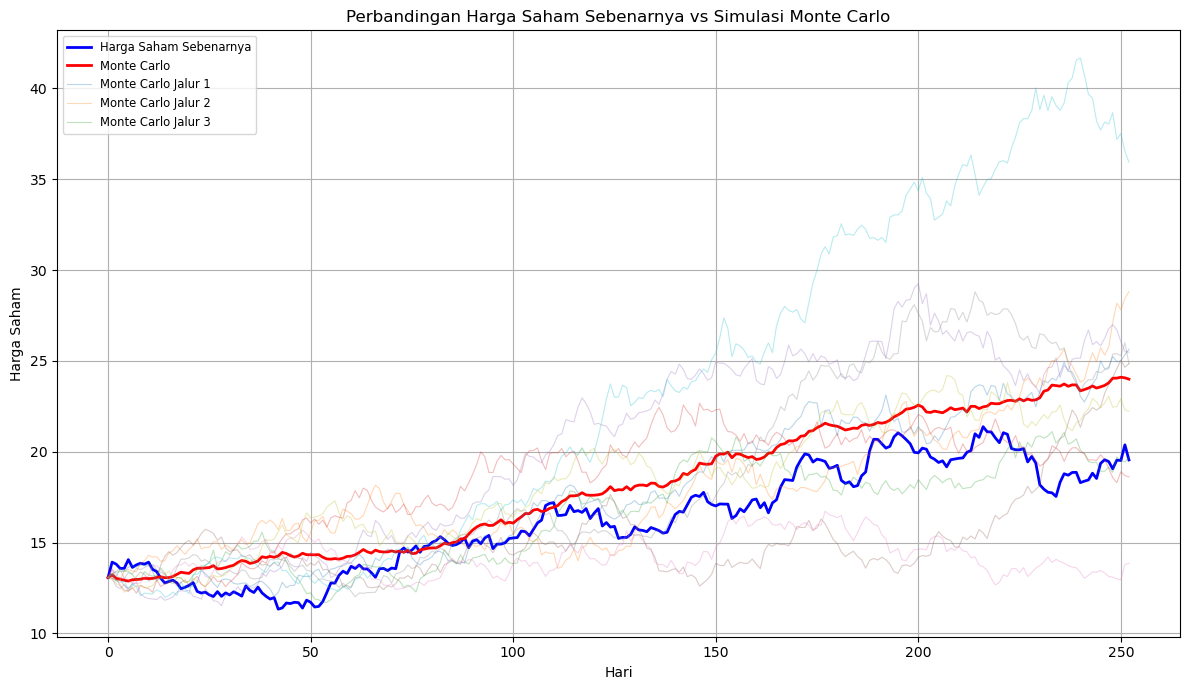

In [19]:
# 1. Ambil Data Harga Saham
df = yf.download('AGI', start='2023-12-12', end='2024-12-13')
df['Harga Saham'] = df['Close']

# 2. Parameter Awal untuk Simulasi Monte Carlo
S0 = df['Harga Saham'].iloc[0]  # Harga awal saham
T = len(df)  # Panjang data (hari)
n_simulations = 10  # Jumlah simulasi jalur
log_return = np.log(df['Harga Saham'] / df['Harga Saham'].shift(1)).dropna()  # Log return harian
mean = log_return.mean()  # Rata-rata log return harian
std = log_return.std()  # Volatilitas log return harian

# 3. Simulasi Monte Carlo
np.random.seed(42)
simulated_prices_mc = np.zeros((T, n_simulations))
simulated_prices_mc[0] = S0

for t in range(1, T):
    random_returns = np.random.normal(loc=mean, scale=std, size=n_simulations)
    simulated_prices_mc[t] = simulated_prices_mc[t-1] * np.exp(random_returns)

average_simulation_mc = np.mean(simulated_prices_mc, axis=1)

# 4. Visualisasi Hasil
plt.figure(figsize=(12, 7))

# Plot harga saham asli
plt.plot(df['Harga Saham'].values, label='Harga Saham Sebenarnya', color='blue', lw=2)

# Plot rata-rata simulasi Monte Carlo
plt.plot(average_simulation_mc, color='red', lw=2, label='Monte Carlo')

# Plot beberapa jalur simulasi Monte Carlo
for i in range(n_simulations):
    plt.plot(simulated_prices_mc[:, i], lw=0.8, alpha=0.3, label=f'Monte Carlo Jalur {i+1}' if i < 3 else "")

# Format plot
plt.title('Perbandingan Harga Saham Sebenarnya vs Simulasi Monte Carlo')
plt.xlabel('Hari')
plt.ylabel('Harga Saham')
plt.legend(loc='upper left', fontsize='small')
plt.grid(True)
plt.tight_layout()
plt.show()